In [26]:
import pandas as pd
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree
import warnings
import random
warnings.filterwarnings('ignore')
%matplotlib inline

In [27]:
os.chdir(r"C:\Users\joaom\Desktop\video_games.csv")# you might have to change this

data = pd.read_csv('video_games.csv')

In [28]:
games = data.shape[0]
features = data.shape[1] - 1 

bad_games = len(data[data.user_rating == 'bad'])
mediocre_games = len(data[data.user_rating == 'mediocre'])
good_games = len(data[data.user_rating == 'good'])
great_games = len(data[data.user_rating == 'great'])
val = [bad_games, mediocre_games, good_games, great_games]

per_bad = (float(bad_games)/games) * 100
per_mediocre = (float(mediocre_games)/games) * 100
per_good = (float(good_games)/games) * 100
per_great = (float(great_games)/games) * 100

print(f'Total de jogos:{games}')
print(f'Total de colunas:{features}')
print(f'Total de jogos "bad":{bad_games}({per_bad:.2f}%)')
print(f'Total de jogos "mediocre":{mediocre_games}({per_mediocre:.2f}%)')
print(f'Total de jogos "good":{good_games}({per_good:.2f}%)')
print(f'Total de jogos "great":{great_games}({per_great:.2f}%)')

Total de jogos:5824
Total de colunas:14
Total de jogos "bad":12(0.21%)
Total de jogos "mediocre":100(1.72%)
Total de jogos "good":2519(43.25%)
Total de jogos "great":3193(54.82%)


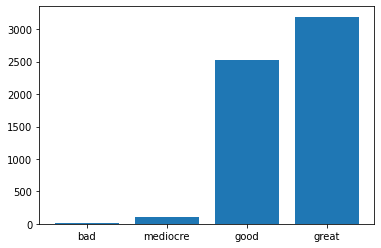

In [29]:
x = np.arange(4)
plt.bar(x,val)
plt.xticks(x, ('bad', 'mediocre', 'good', 'great'))
plt.show()

In [30]:
num_data = data.drop(['name', 'user_score', 'summary'], 1)

num_data.loc[num_data['in_franchise'] == False, 'in_franchise'] = 0
num_data.loc[num_data['in_franchise'] == True, 'in_franchise'] = 1

categories = ['main_game', 'expansion', 'expanded_game', 'dlc_addon', 'bundle', 'remake', 'remaster', 'port', 'standalone_expansion', 'episode', 'mod', 'fork', 'season']
i = 1
for cat in categories:
    num_data.loc[num_data['category'] == cat, 'category'] = i
    i += 1
    
ratings = ['bad', 'mediocre', 'good', 'great']
i = 1
for rate in ratings:
    num_data.loc[num_data['user_rating'] == rate, 'user_rating'] = i
    i += 1

In [32]:
genres = data['genres'].unique()

i = 0
genres_text = ''
for genre in genres:
    genres_text += f'{genre}, '

genres_full = genres_text.split(", ")    
    
genres_final = []

for genre in genres_full:
    if genre not in genres_final:
        genres_final.append(genre)
        
genres_final = genres_final[:22] + genres_final[23:]
genres_final[23] = 'Unknown'    

In [34]:
i = 0
test = pd.isna(num_data['genres']) == True
num_data.loc[test, 'genres'] = 'Unknown'

for genre in genres_final:
    num_data[genre] = 0
    for i in range (num_data.shape[0]):
        if genre in num_data['genres'][i]:
            num_data[genre][i] = 1          
        i += 1

Shooter
Adventure
Role-playing (RPG)
Platform
Puzzle
Racing
Simulator
Hack and slash/Beat 'em up
Arcade
Point-and-click
Turn-based strategy (TBS)
Indie
Strategy
Real Time Strategy (RTS)
Fighting
Tactical
Sport
MOBA
Card & Board Game
Visual Novel
Music
Pinball
Quiz/Trivia
Unknown


In [35]:
platforms = data['platforms'].unique()

i = 0
platforms_text = ''
for platform in platforms:
    platforms_text += f'{platform}, '

platforms_full = platforms_text.split(", ")    
    
platforms_final = []

for platform in platforms_full:
    if platform not in platforms_final:
        platforms_final.append(platform)
                      
platforms_final = ['PC (Microsoft Windows)', 'PlayStation 3', 'Xbox 360', 'PlayStation 4', 'Xbox One', 'PlayStation 5', 'Xbox Series X|S', 'Nintendo Switch', 'Linux', 'Mac', 'Android', 'PlayStation 2', 'Xbox', 'iOS', 'Wii U', 'Nintendo 64', 'Wii', 'PlayStation Vita',  'Nintendo DSi', 'SteamVR', 'PlayStation VR', 'Oculus Rift', 'Nintendo DS']            

In [36]:
i = 0

test = pd.isna(num_data['platforms']) == True
num_data.loc[test, 'platforms'] = 'Unknown'



for platform in platforms_final:
    num_data[platform] = 0
    for i in range (num_data.shape[0]):
        if platform in num_data['platforms'][i]:
            num_data[platform][i] = 1          
        i += 1

PC (Microsoft Windows)
PlayStation 3
Xbox 360
PlayStation 4
Xbox One
PlayStation 5
Xbox Series X|S
Nintendo Switch
Linux
Mac
Android
PlayStation 2
Xbox
iOS
Wii U
Nintendo 64
Wii
PlayStation Vita
Nintendo DSi
SteamVR
PlayStation VR
Oculus Rift
Nintendo DS


In [37]:
companies = data['companies'].unique()

i = 0
companies_text = ''
for companie in companies:
    companies_text += f'{companie}, '

companies_full = companies_text.split(", ")    
    
companies_final = []

for companie in companies_full:
    if companie not in companies_final:
        companies_final.append(companie)
        
print(len(companies_final))    

3358


In [42]:
os.chdir(r"C:\Users\joaom\Desktop") # you might have to change this
num_data = pd.read_csv('num_data.csv')

In [60]:
#Separar as features das labels
features = num_data.drop(['id','user_rating', 'genres', 'platforms', 'companies'], 1)

labels = num_data['user_rating']

print('Features')
print(features_scale)

print("\n\n\n\nLabels")
print(labels)

Features
      category  n_dlcs  n_expansions  year  follows  in_franchise  \
0            1       0             0  2013     1766             1   
1            1       4             2  2015     1516             1   
2            1       3             0  2011     1046             0   
3            1       3             0  2011      963             1   
4            1       0             0  2007      894             1   
...        ...     ...           ...   ...      ...           ...   
5819         1       0             0  2005        5             0   
5820         1       0             0  2001       11             0   
5821         1       0             0  2003        1             0   
5822         2       0             0  2006        8             1   
5823         2       0             0  2002        5             1   

      n_user_reviews  Shooter  Adventure  Role-playing (RPG)  ...  iOS  Wii U  \
0               3369        1          1                   0  ...    0      0   


In [62]:
X = features[:4824]
y = labels[:4824]
y = y.astype('int')
total_left = 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))
print(y_train.value_counts())

3376 3376
1448 1448
4    1935
3    1398
2      40
1       3
Name: user_rating, dtype: int64


In [95]:
print('Decision Tree')

clf_DT = DecisionTreeClassifier(random_state=0)
clf_DT.fit(X_train, y_train)
pred = clf_DT.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print(f"Accuracy:{accuracy:.4f}")
print(clf_DT)

Decision Tree
Accuracy:0.6153
DecisionTreeClassifier(random_state=0)


In [96]:
print('Decision Tree')

param_grid = {
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2,4,6,8,10],
    
}

search = RandomizedSearchCV(DecisionTreeClassifier(random_state=0), param_grid) 

search.fit(X_train, y_train)
clf_DTH = search.best_estimator_
pred = clf_DTH.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(f"Accuracy:{accuracy:.4f}")
print(clf_DTH)

Decision Tree
Accuracy:0.6195
DecisionTreeClassifier(max_depth=100, min_samples_leaf=5, min_samples_split=4,
                       random_state=0)


In [97]:
prevision = features_scale[4824:]

game_id_full = data['id']
game_id = game_id_full[4824:]

user_rating_full = num_data['user_rating']
user_rating = user_rating_full[4824:]

pred_DTH = clf_DTH.predict(prevision)

df_DTH = pd.DataFrame({'real': user_rating, 'prevision': pred_DTH, 'game_id': game_id})

for i in range(1,5):
    df_DTH.loc[df_DTH['real'] == i, 'real'] = ratings[i-1]

for i in range(1,5):
    df_DTH.loc[df_DTH['prevision'] == i, 'prevision'] = ratings[i-1]

Accuracy:0.5420


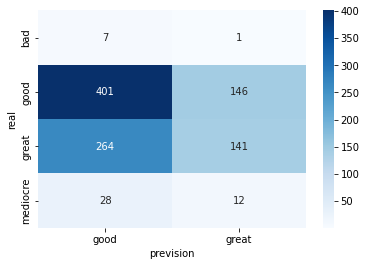

In [98]:
df = pd.DataFrame(df_DTH, columns=['real', 'prevision'])
cf_matrix = pd.crosstab(df['real'], df['prevision'], rownames=['real'], colnames=['prevision'])
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt="d")
accuracy = float(0)
for rate in list(cf_matrix):   
    accuracy += cf_matrix[rate][rate]
accuracy = accuracy / total_left

print(f'Accuracy:{accuracy:.4f}')

In [99]:

print('KNN')

clf_KNN = KNeighborsClassifier()
clf_KNN.fit(X_train, y_train)
pred = clf_KNN.predict(X_test)

accuracy = accuracy_score(y_test, pred)

print(f"Accuracy:{accuracy:.4f}")

KNN
Accuracy:0.6326


In [100]:
#KNN hyper parameters

print('KNN')

param_grid = {
    'n_neighbors': [3, 4, 5, 6],
    'leaf_size': [20, 30, 40, 50],
    'p': [1, 2, 3]   
}

search = RandomizedSearchCV(KNeighborsClassifier(), param_grid, n_jobs = 1) 
search.fit(X_train, y_train)
clf_KNNH = search.best_estimator_
pred = clf_KNNH.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(f"Accuracy:{accuracy:.4f}")
print(clf_KNNH)

KNN
Accuracy:0.6367
KNeighborsClassifier(leaf_size=20, p=1)


In [101]:
#KNN prevision

prevision = features_scale[4824:]

game_id_full = data['id']
game_id = game_id_full[4824:]

user_rating_full = num_data['user_rating']
user_rating = user_rating_full[4824:]

pred_KNNH = clf_KNNH.predict(prevision)

df_KNNH = pd.DataFrame({'real': user_rating, 'prevision': pred_KNNH, 'game_id': game_id})

ratings = ['bad', 'mediocre', 'good', 'great']
for i in range(1,5):
    df_KNNH.loc[df_KNNH['real'] == i, 'real'] = ratings[i-1]

for i in range(1,5):
    df_KNNH.loc[df_KNNH['prevision'] == i, 'prevision'] = ratings[i-1]

KNN
Accuracy:0.55


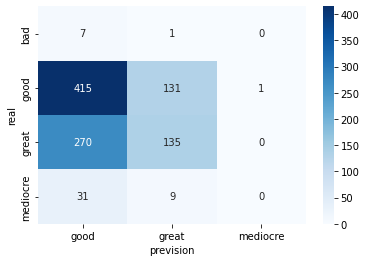

In [102]:
#KNN confusion matrix

df = pd.DataFrame(df_KNNH, columns=['real', 'prevision'])
cf_matrix = pd.crosstab(df['real'], df['prevision'], rownames=['real'], colnames=['prevision'])
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt="d")

accuracy = float(0)
for rate in list(cf_matrix):   
    accuracy += cf_matrix[rate][rate]
accuracy = accuracy / total_left
print('KNN')
print(f'Accuracy:{accuracy}')

In [103]:
#Random prevision

game_id_full = data['id']
game_id = game_id_full[4824:] 

user_rating_full = num_data['user_rating']
user_rating = user_rating_full[4824:]

df_RND = pd.DataFrame({'real': user_rating, 'prevision': 0})

for i in range(df_RND.shape[0]+1):
    num = random.randint(1, 10000)
    if num <= 21:
        df_RND['prevision'][i+4823] = 1 
    elif num <= 172+21:
        df_RND['prevision'][i+4823] = 2
    elif num <= 4325+172+21:
        df_RND['prevision'][i+4823] = 3
    elif num <= 5482+4325+172+21:
        df_RND['prevision'][i+4823] = 4
        
ratings = ['bad', 'mediocre', 'good', 'great']
for i in range(1,5):
    df_RND.loc[df_RND['real'] == i, 'real'] = ratings[i-1]

for i in range(1,5):
    df_RND.loc[df_RND['prevision'] == i, 'prevision'] = ratings[i-1]

Accuracy:0.472


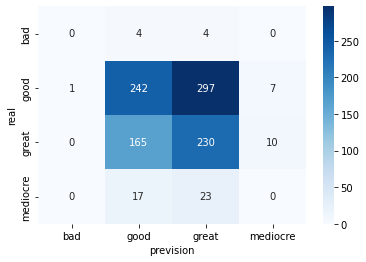

In [104]:
df = pd.DataFrame(df_RND, columns=['real', 'prevision'])
cf_matrix = pd.crosstab(df['real'], df['prevision'], rownames=['real'], colnames=['prevision'])
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt="d")

accuracy = float(0)
for rate in list(cf_matrix):  
    accuracy += cf_matrix[rate][rate]
accuracy = accuracy / total_left
print(f'Accuracy:{accuracy}')